In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:


beneficiary_data = pd.read_csv("Resources\Test_Beneficiarydata-1542969243754.csv")
inpatient_data = pd.read_csv("Resources\Test_Inpatientdata-1542969243754.csv")
outpatient_data = pd.read_csv("Resources\Test_Outpatientdata-1542969243754.csv")
test_data = pd.read_csv("Resources\Test-1542969243754.csv")
train_beneficiary = pd.read_csv("Resources\Train_Beneficiarydata-1542865627584.csv")
train_inpatient = pd.read_csv("Resources\Train_Inpatientdata-1542865627584.csv")
train_outpatient = pd.read_csv("Resources\Train_Outpatientdata-1542865627584.csv")
train_data = pd.read_csv("Resources\Train-1542865627584.csv")

dict = {
    "test_beneficiary-data" : beneficiary_data,
    "test_inpatient-data" : inpatient_data,
    "test_outpatient-data" : outpatient_data,
    "test_data" : test_data,
    "train_beneficiary-data" : beneficiary_data,
    "train_inpatient-data" : train_inpatient,
    "train_outpatient-data" : train_outpatient,
    "train_data" : train_data
}



In [18]:
# for key in dict.keys():
#     print(key)
#     print("-")
#     [print(x) for x in list(dict[key].keys())] 
#     print("")



In [3]:
in_out_data = train_inpatient.append(train_outpatient)
df = pd.merge(in_out_data,train_data)
df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,Yes
2,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,Yes
3,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,Yes
4,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,NaN,2009-01-08,...,NaN,NaN,NaN,8543.0,NaN,NaN,NaN,NaN,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE154687,CLM184358,2009-02-08,2009-02-08,PRV54302,3300,PHY376238,PHY376238,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
558207,BENE157252,CLM603185,2009-09-28,2009-09-28,PRV57762,1900,PHY432730,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
558208,BENE157378,CLM460770,2009-07-09,2009-07-29,PRV51577,2100,PHY338096,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
558209,BENE158295,CLM306999,2009-04-16,2009-04-16,PRV53083,10,PHY416646,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


In [4]:
df = df[['Provider','InscClaimAmtReimbursed',"ClmDiagnosisCode_1","ClmProcedureCode_1","PotentialFraud"]]
filt = df.PotentialFraud == "Yes"
df_yes = df[filt]
filt = df.PotentialFraud == "No"
df_no = df[filt]

In [59]:
#df_yes

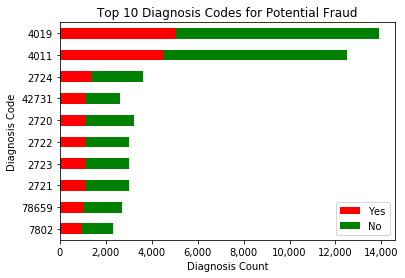

In [6]:
# Diagnosis
diag_yes = df_yes.groupby(by="ClmDiagnosisCode_1").count().rename(columns={'Provider':'Diagnosis Count'})['Diagnosis Count'].sort_values(ascending=False)
diag_no = df_no.groupby(by="ClmDiagnosisCode_1").count().rename(columns={'Provider':'Diagnosis Count'})['Diagnosis Count'].sort_values(ascending=False)

diag = pd.DataFrame({
    'Yes' : diag_yes,
    'No' : diag_no
})

ax = diag.sort_values(by='Yes',ascending=False).head(10).plot.barh(stacked=True, color=['red','green'])

ax.invert_yaxis()
plt.ylabel("Diagnosis Code")
plt.xlabel("Diagnosis Count")
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Top 10 Diagnosis Codes for Potential Fraud")
plt.savefig('output/top-10-diagnoses.png')
plt.show()


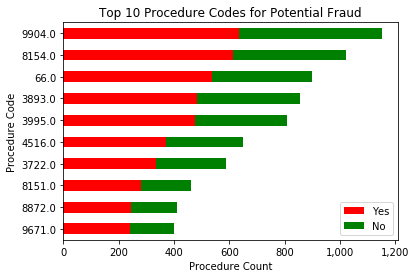

In [7]:
# Procedure
proc_yes = df_yes.groupby(by="ClmProcedureCode_1").count().rename(columns={'Provider':'Procedure Count'})['Procedure Count'].sort_values(ascending=False)
proc_no = df_no.groupby(by="ClmProcedureCode_1").count().rename(columns={'Provider':'Procedure Count'})['Procedure Count'].sort_values(ascending=False)

proc = pd.DataFrame({
    'Yes' : proc_yes,
    'No' : proc_no
})

ax = proc.sort_values(by='Yes',ascending=False).head(10).plot.barh(stacked=True, color=['red','green'])

ax.invert_yaxis()
plt.ylabel("Procedure Code")
plt.xlabel("Procedure Count")
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Top 10 Procedure Codes for Potential Fraud")
plt.savefig('output/top-10-procedures.png')
plt.show()
